In [1]:
#viscosity.ipynb
#by Joe Hahn, jmh.datasciences@gmail.com, 15 April 2018.
#plot evolution of viscous ringlet

In [2]:
#restore output
from helper_fns import *
execfile('inputs.py')
r, t, vr, vt, times, lambda0 = restore_output(output_folder)
a, e, wt, M = coords2elem(J2, Rp, r, t, vr, vt)
print 'r.shape = ', r.shape
print 'total_ring_mass = ', total_ring_mass
print 'shear_viscosity = ', shear_viscosity
print 'initial_orbits = ', initial_orbits
print 'e.min() = ', e.min()
print 'e.max() = ', e.max()

r.shape =  (1001, 2, 61)
total_ring_mass =  1.5e-09
shear_viscosity =  1e-12
initial_orbits =  {'adeda': 0.056575, 'shape': 'eccentric', 'e': 0.005}
e.min() =  0.0030786243096846246
e.max() =  0.006125243720313146


In [3]:
#calculate da, de, dwt etc at inner & outer streamline's periapse
from libration import *
a_inner, a_outer, a_avg, delta_a, e_inner, e_outer, e_avg, delta_e, delta_e_avg, \
    e_prime, e_prime_avg, delta_wt, delta_wt_avg, wt_prime, wt_prime_avg, q, Hq = \
    calculate_Deltas(r, a, e, wt)

In [4]:
#prep plots
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
sns.set(font_scale=1.5, font='DejaVu Sans')
import numpy as np

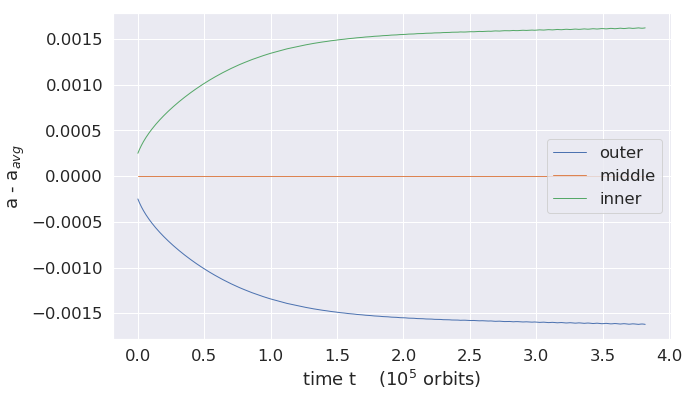

In [5]:
#plot streamline's mutual a-evolution
twopi = 2*np.pi
f, ax = plt.subplots(figsize=(10, 6))
x = times/(2*np.pi)/1.0e5
y = a_inner - a_avg
p = ax.plot(x, y, linestyle='-', linewidth=1, alpha=1, label='outer')
y = a_avg - a_avg
p = ax.plot(x, y, linestyle='-', linewidth=1, alpha=1, label='middle')
y = a_outer - a_avg
p = ax.plot(x, y, linestyle='-', linewidth=1, alpha=1, label='inner')
p = ax.set_xlabel(r'time t    ($10^5$ orbits)')
p = ax.set_ylabel('a - a$_{avg}$')
p = plt.legend(loc='center right')

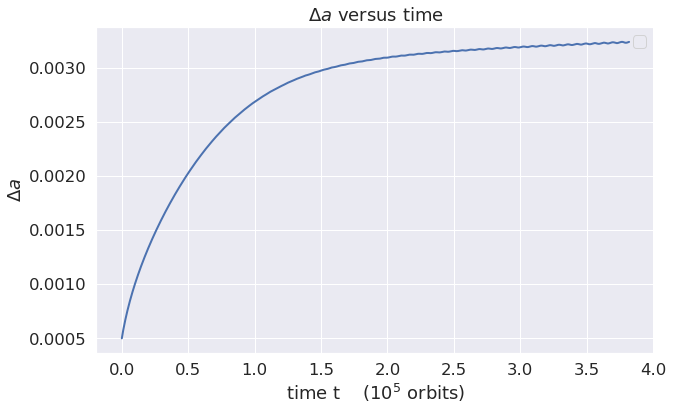

In [6]:
#plot delta_a versus time
x = times/(2*np.pi)/1.0e5
y = delta_a
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', linewidth=2)
p = ax.set_title(r'$\Delta a$ versus time')
p = ax.set_xlabel(r'time t    ($10^5$ orbits)')
p = ax.set_ylabel(r'$\Delta a$')
p = plt.legend()
p = plt.savefig('figs/da.png')

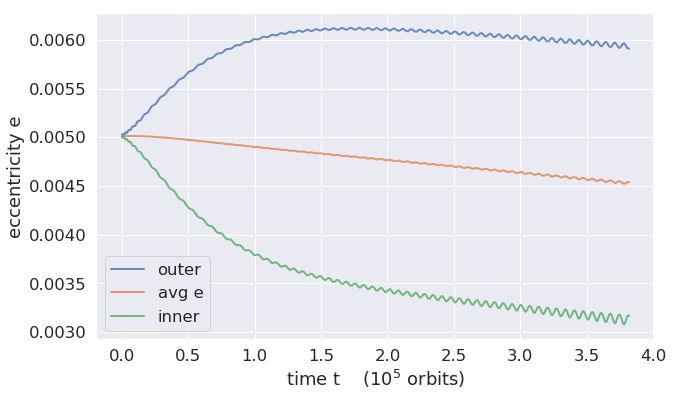

In [7]:
#plot streamline's e-evolution
twopi = 2*np.pi
f, ax = plt.subplots(figsize=(10, 6))
x = times/(2*np.pi)/1.0e5
y = e_outer
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8, label='outer')
y = e_avg
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8, label='avg e')
y = e_inner
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8, label='inner')
p = ax.set_xlabel(r'time t    ($10^5$ orbits)')
p = ax.set_ylabel('eccentricity e')
p = plt.legend()

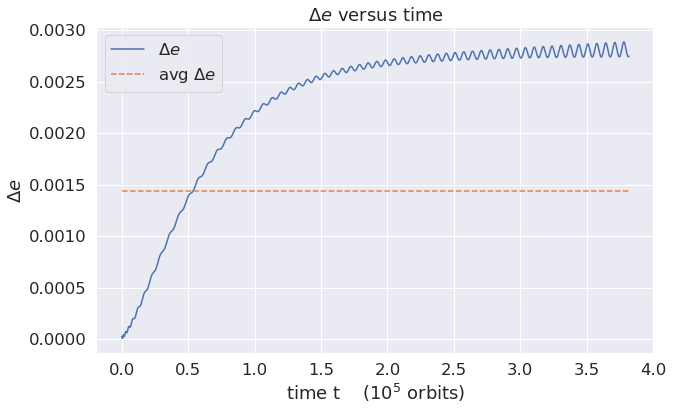

In [8]:
#plot delta_e versus time
f, ax = plt.subplots(figsize=(10, 6))
x = times/(2*np.pi)/1.0e5
y = delta_e
p = ax.plot(x, y, linestyle='-', label=r'$\Delta e$')
y = y*0 + delta_e_avg
p = ax.plot(x, y, linestyle='dashed', label=r'avg $\Delta e$')
p = ax.set_title(r'$\Delta e$ versus time')
p = ax.set_xlabel(r'time t    ($10^5$ orbits)')
p = ax.set_ylabel(r'$\Delta e$')
p = plt.legend()

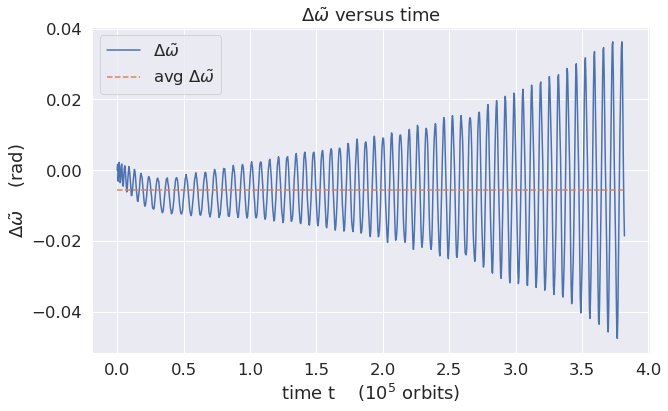

In [9]:
#plot delta_wt versus time
x = times/(2*np.pi)/1.0e5
y = delta_wt
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', label=r'$\Delta\tilde{\omega}$')
y = y*0 + delta_wt_avg
p = ax.plot(x, y, linestyle='dashed', label=r'avg $\Delta\tilde{\omega}$')
p = ax.set_title(r'$\Delta\tilde{\omega}$ versus time')
p = ax.set_xlabel(r'time t    ($10^5$ orbits)')
p = ax.set_ylabel(r'$\Delta\tilde{\omega}$    (rad)')
p = plt.legend()

stationary e' =  2.8778523486581995
stationary wt' =  -0.056790533209299415


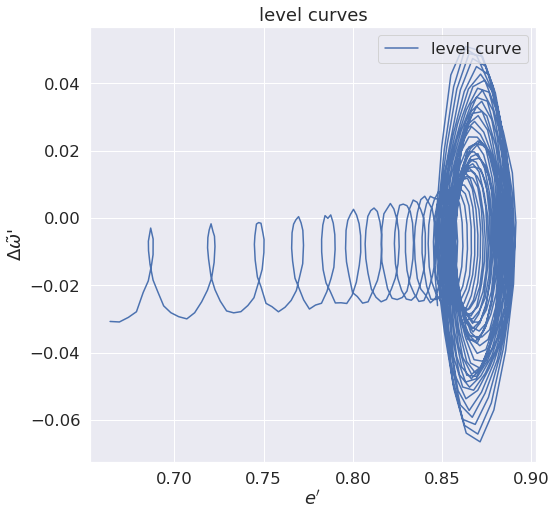

In [10]:
#plot x=delta_e_prime, y=wt_prime over time
f, ax = plt.subplots(figsize=(8, 8))
x = e_prime
y = wt_prime
idx = (times > times.max()/8)
x = x[idx]
y = y[idx]
p = ax.plot(x, y, linestyle='-', label='level curve')
p = ax.set_title('level curves')
p = ax.set_xlabel(r"$e'$")
p = ax.set_ylabel(r"$\Delta\tilde{\omega}$'")
p = plt.legend(loc='upper right')
print "stationary e' = ", e_prime_avg[0]
print "stationary wt' = ", wt_prime_avg[0]

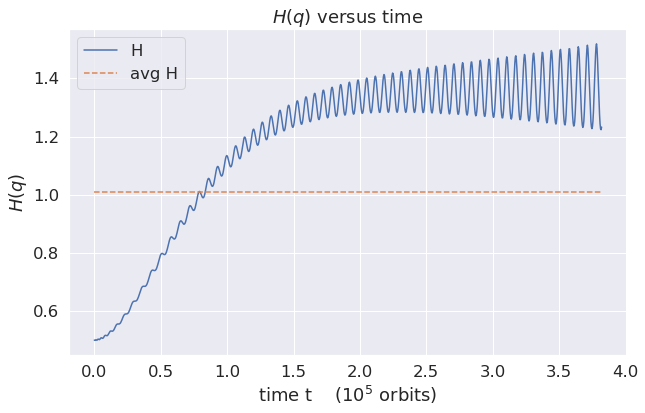

In [11]:
#plot Hq versus time
x = times/(2*np.pi)/1.0e5
y = Hq
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', label='H')
y = x*0 + (Hq.max() + Hq.min())/2
p = ax.plot(x, y, linestyle='dashed', label='avg H')
p = ax.set_title(r'$H(q)$ versus time')
p = ax.set_xlabel(r'time t    ($10^5$ orbits)')
p = ax.set_ylabel(r'$H(q)$')
p = plt.legend()

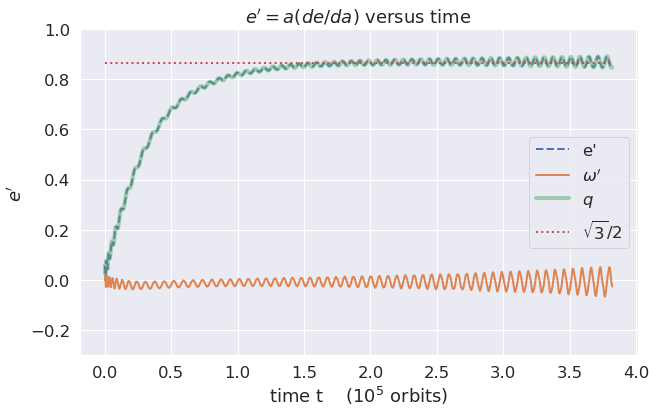

In [12]:
#plot e_prime wt_prime and q versus time
x = times/(2*np.pi)/1.0e5
y = e_prime
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='dashed', linewidth=2, label="e'")
y = wt_prime
p = ax.plot(x, y, linestyle='-', linewidth=2, label=r"$\omega'$")
y = q
p = ax.plot(x, y, linestyle='-', linewidth=4, label=r'$q$', alpha=0.5)
y = x*0 + np.sqrt(3.0)/2.0
p = ax.plot(x, y, linestyle='dotted', linewidth=2, label=r"$\sqrt{3}/2$")
p = ax.set_title(r"$e'=a(de/da)$ versus time")
p = ax.set_xlabel(r'time t    ($10^5$ orbits)')
p = ax.set_ylabel(r"$e'$")
p = ax.set_ylim(-0.3, 1)
p = plt.legend()
p = plt.savefig('figs/adeda.png')